**IMPORTANDO AS BIBLIOTECAS**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**2 - Carregando o dataframe SINASC**

In [3]:
sinasc_raw = pd.read_csv('/content/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


**1. Idade media das mães e dos pais por município (coluna munResNome)**


In [7]:
# Cálculo da idade média das mães e dos pais agrupada por município
idade_media = sinasc_raw.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean().reset_index()

In [8]:
# Exibir os 10 primeiros resultados
idade_media.head(10)

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,25.991826,29.548701
1,Alto Alegre dos Parecis,24.844156,29.179104
2,Alto Paraíso,24.960177,28.833333
3,Alvorada D'Oeste,25.770732,30.757282
4,Ariquemes,25.607866,32.466667
5,Buritis,25.559177,30.812500
6,Cabixi,26.037500,34.333333
7,Cacaulândia,25.546667,36.333333
8,Cacoal,26.890102,30.931854
9,Campo Novo de Rondônia,24.825301,30.500000


from matplotlib import pyplot as plt
_df_0['IDADEMAE'].plot(kind='hist', bins=20, title='IDADEMAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['IDADEPAI'].plot(kind='hist', bins=20, title='IDADEPAI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='IDADEMAE', y='IDADEPAI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['IDADEMAE'].plot(kind='line', figsize=(8, 4), title='IDADEMAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['IDADEPAI'].plot(kind='line', figsize=(8, 4), title='IDADEPAI')
plt.gca().spines[['top', 'right']].set_visible(False)

**2 - Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 14/12, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.**

In [9]:
# Converter a coluna de data
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

In [12]:
# Filtrar apenas os nascimentos ocorridos em 14 de dezembro (14/12)
aniversario = sinasc_raw[(sinasc_raw['DTNASC'].dt.day == 14) & (sinasc_raw['DTNASC'].dt.month == 12)]

In [13]:
# Calcular o peso médio dos bebês por sexo e escolaridade da mãe
peso_medio = aniversario.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index()

In [14]:
# Renomear as colunas para português
peso_medio.columns = ['Sexo do bebê', 'Escolaridade da mãe', 'Peso médio (g)']

In [15]:
# Exibir a tabela com os resultados
print("Peso médio dos bebês nascidos em 14/12 por sexo e escolaridade da mãe:\n")
display(peso_medio)

Peso médio dos bebês nascidos em 14/12 por sexo e escolaridade da mãe:



,Sexo do bebê,Escolaridade da mãe,Peso médio (g)
0,Feminino,1 a 3 anos,3092.5000
1,Feminino,12 anos ou mais,3125.6250
2,Feminino,4 a 7 anos,3005.0000
3,Feminino,8 a 11 anos,3267.1875
4,Masculino,12 anos ou mais,3141.2500
5,Masculino,4 a 7 anos,3583.7500
6,Masculino,8 a 11 anos,3403.1250


from matplotlib import pyplot as plt
peso_medio['Peso médio (g)'].plot(kind='hist', bins=20, title='Peso médio (g)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
peso_medio.groupby('Sexo do bebê').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
peso_medio.groupby('Escolaridade da mãe').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
peso_medio['Peso médio (g)'].plot(kind='line', figsize=(8, 4), title='Peso médio (g)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Escolaridade da mãe'].value_counts()
    for x_label, grp in peso_medio.groupby('Sexo do bebê')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sexo do bebê')
_ = plt.ylabel('Escolaridade da mãe')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(peso_medio['Sexo do bebê'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(peso_medio, x='Peso médio (g)', y='Sexo do bebê', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(peso_medio['Escolaridade da mãe'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(peso_medio, x='Peso médio (g)', y='Escolaridade da mãe', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

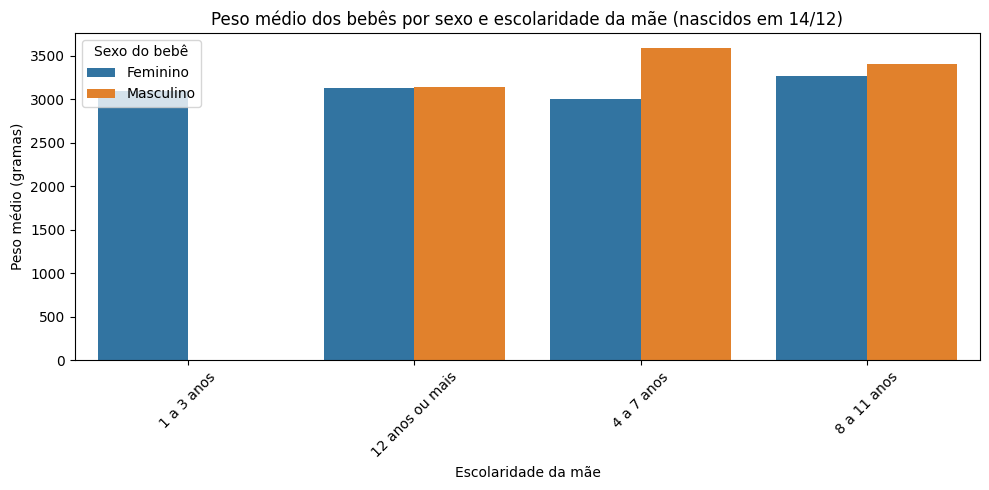

In [16]:
# Criar o gráfico
plt.figure(figsize=(10,5))
sns.barplot(data=peso_medio, x='Escolaridade da mãe', y='Peso médio (g)', hue='Sexo do bebê')
plt.title('Peso médio dos bebês por sexo e escolaridade da mãe (nascidos em 14/12)')
plt.xticks(rotation=45)
plt.xlabel('Escolaridade da mãe')
plt.ylabel('Peso médio (gramas)')
plt.legend(title='Sexo do bebê')
plt.tight_layout()
plt.show()

**3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?**

In [17]:
# Contar nascimentos por município
nascimentos_por_municipio = sinasc_raw['munResNome'].value_counts()

In [18]:
# Encontrar o município com menos nascimentos
municipio_menos = nascimentos_por_municipio.idxmin()
print(f"Município com menos nascimentos: {municipio_menos}")

Município com menos nascimentos: Município ignorado - RO


In [19]:
# Filtrar os dados desse município
dados_menos = sinasc_raw[sinasc_raw['munResNome'] == municipio_menos]

In [21]:
# Calcular estatísticas da idade das mães e pais
estatisticas_maes = dados_menos['IDADEMAE'].agg(['mean', 'max', 'min'])
estatisticas_pais = dados_menos['IDADEPAI'].agg(['mean', 'max', 'min'])

In [23]:
print("\n Idade das mães:")
print(estatisticas_maes)


 Idade das mães:
mean    24.0
max     24.0
min     24.0
Name: IDADEMAE, dtype: float64


In [24]:
print("\n Idade dos pais:")
print(estatisticas_pais)


 Idade dos pais:
mean    22.0
max     22.0
min     22.0
Name: IDADEPAI, dtype: float64


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [4]:
sinasc_raw.dtypes

,0
ORIGEM,int64
CODESTAB,float64
CODMUNNASC,int64
LOCNASC,int64
IDADEMAE,int64
...,...
munResUf,object
munResLat,float64
munResLon,float64
munResAlt,float64


In [5]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [6]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [33]:
# Converter a data para o formato datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

In [34]:
# Filtrar apenas os nascimentos em 14/12
aniversario = sinasc_raw[(sinasc_raw['DTNASC'].dt.day == 14) & (sinasc_raw['DTNASC'].dt.month == 12)]

In [35]:
# Agrupar por escolaridade da mãe e sexo do bebê, calculando médias
resumo = aniversario.groupby(['ESCMAE', 'SEXO']).agg({
    'IDADEMAE': 'mean',
    'PESO': 'mean'
}).reset_index()

In [36]:
# Renomear colunas para português
resumo.columns = ['Escolaridade da mãe', 'Sexo do bebê', 'Idade média da mãe', 'Peso médio do bebê (g)']

In [38]:
# Mostrar os dados resumidos
print("Resumo dos nascimentos em 14/12:")
display(resumo)

Resumo dos nascimentos em 14/12:


,Escolaridade da mãe,Sexo do bebê,Idade média da mãe,Peso médio do bebê (g)
0,1 a 3 anos,Feminino,25.0000,3092.5000
1,12 anos ou mais,Feminino,29.6250,3125.6250
2,12 anos ou mais,Masculino,34.0000,3141.2500
3,4 a 7 anos,Feminino,20.4000,3005.0000
4,4 a 7 anos,Masculino,23.2500,3583.7500
5,8 a 11 anos,Feminino,24.8125,3267.1875
6,8 a 11 anos,Masculino,22.6875,3403.1250


from matplotlib import pyplot as plt
resumo['Idade média da mãe'].plot(kind='hist', bins=20, title='Idade média da mãe')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resumo['Peso médio do bebê (g)'].plot(kind='hist', bins=20, title='Peso médio do bebê (g)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
resumo.groupby('Escolaridade da mãe').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
resumo.groupby('Sexo do bebê').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resumo.plot(kind='scatter', x='Idade média da mãe', y='Peso médio do bebê (g)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resumo['Idade média da mãe'].plot(kind='line', figsize=(8, 4), title='Idade média da mãe')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
resumo['Peso médio do bebê (g)'].plot(kind='line', figsize=(8, 4), title='Peso médio do bebê (g)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sexo do bebê'].value_counts()
    for x_label, grp in resumo.groupby('Escolaridade da mãe')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Escolaridade da mãe')
_ = plt.ylabel('Sexo do bebê')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(resumo['Escolaridade da mãe'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(resumo, x='Idade média da mãe', y='Escolaridade da mãe', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(resumo['Sexo do bebê'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(resumo, x='Idade média da mãe', y='Sexo do bebê', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(resumo['Escolaridade da mãe'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(resumo, x='Peso médio do bebê (g)', y='Escolaridade da mãe', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(resumo['Sexo do bebê'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(resumo, x='Peso médio do bebê (g)', y='Sexo do bebê', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='Idade média da mãe', ylabel='Peso médio do bebê (g)'>

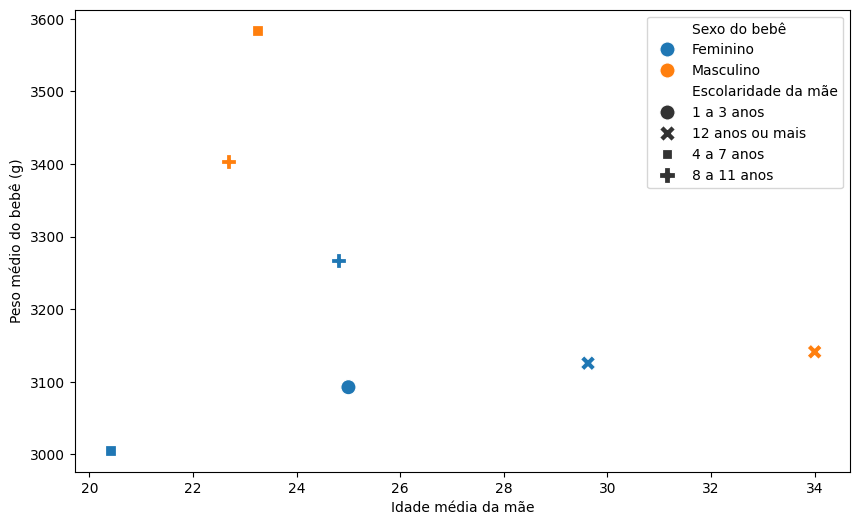

In [39]:
# Criar gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=resumo,
    x='Idade média da mãe',
    y='Peso médio do bebê (g)',
    hue='Sexo do bebê',
    style='Escolaridade da mãe',
    s=120
)

In [26]:
# Filtrar os nascimentos de março
sinasc_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]

In [27]:
# Contar nascimentos por município
mais_marco = sinasc_marco['munResNome'].value_counts().idxmax()
print(f"Município com mais nascimentos em março: {mais_marco}")

Município com mais nascimentos em março: Porto Velho


In [28]:
# Filtrar os dados desse município
dados_marco = sinasc_marco[sinasc_marco['munResNome'] == mais_marco]

In [29]:
# Estatísticas de filhos vivos e idade dos pais
filhos_vivos_stats = dados_marco['QTDFILVIVO'].agg(['mean', 'max', 'min'])
idade_pais_stats = dados_marco['IDADEPAI'].agg(['mean', 'max', 'min'])

In [30]:
print("\n Filhos vivos - Média, Máxima e Mínima:")
print(filhos_vivos_stats)


 Filhos vivos - Média, Máxima e Mínima:
mean    1.295056
max     9.000000
min     0.000000
Name: QTDFILVIVO, dtype: float64


In [31]:
print("\n Idade dos pais - Média, Máxima e Mínima:")
print(idade_pais_stats)


 Idade dos pais - Média, Máxima e Mínima:
mean    34.629032
max     62.000000
min     19.000000
Name: IDADEPAI, dtype: float64


/tmp/ipython-input-875767390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_idade['IDADEMAE'] = pd.to_numeric(dados_idade['IDADEMAE'], errors='coerce')
/tmp/ipython-input-875767390.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sexo do bebê', title_fontsize=11)


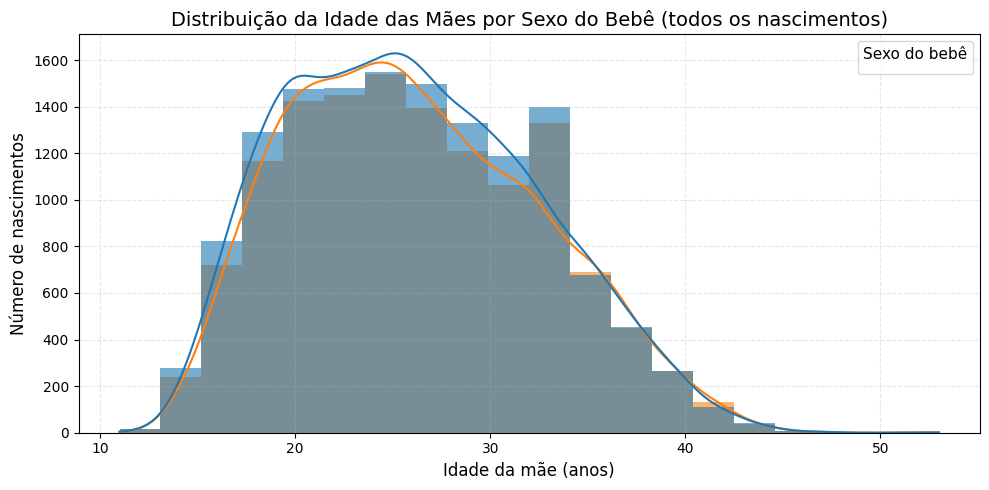

In [59]:
#Histograma — Distribuição da Idade das Mães (todos os nascimentos)
# -----------------------------
plt.figure(figsize=(10,5))

# Remover possíveis valores ausentes e garantir tipos corretos
dados_idade = sinasc_raw.dropna(subset=['IDADEMAE', 'SEXO'])
dados_idade['IDADEMAE'] = pd.to_numeric(dados_idade['IDADEMAE'], errors='coerce')

# Criar o histograma
sns.histplot(
    data=dados_idade,
    x='IDADEMAE',
    hue='SEXO',
    bins=20,
    kde=True,        # linha de densidade
    alpha=0.6,       # transparência
    edgecolor=None   # remove bordas dos bins
)

# Personalização do gráfico
plt.title('Distribuição da Idade das Mães por Sexo do Bebê (todos os nascimentos)', fontsize=14)
plt.xlabel('Idade da mãe (anos)', fontsize=12)
plt.ylabel('Número de nascimentos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Sexo do bebê', title_fontsize=11)
plt.tight_layout()
plt.show()


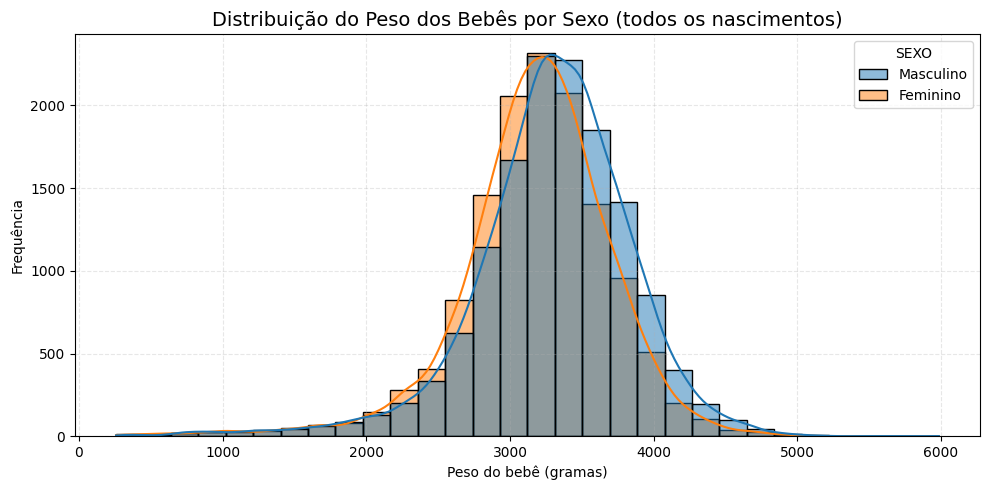

In [58]:
# Histograma - Peso dos bebês por Sexo
plt.figure(figsize=(10,5))
sns.histplot(data=sinasc_raw, x='PESO', hue='SEXO', bins=30, kde=True, alpha=0.5)
plt.title('Distribuição do Peso dos Bebês por Sexo (todos os nascimentos)', fontsize=14)
plt.xlabel('Peso do bebê (gramas)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [51]:
# Calcular a correlação entre 'IDADEMAE' e 'PESO'
correlacao_idade_peso = sinasc_raw['IDADEMAE'].corr(sinasc_raw['PESO'])

print(f"A correlação entre a idade da mãe e o peso do bebê é: {correlacao_idade_peso:.2f}")

A correlação entre a idade da mãe e o peso do bebê é: 0.05


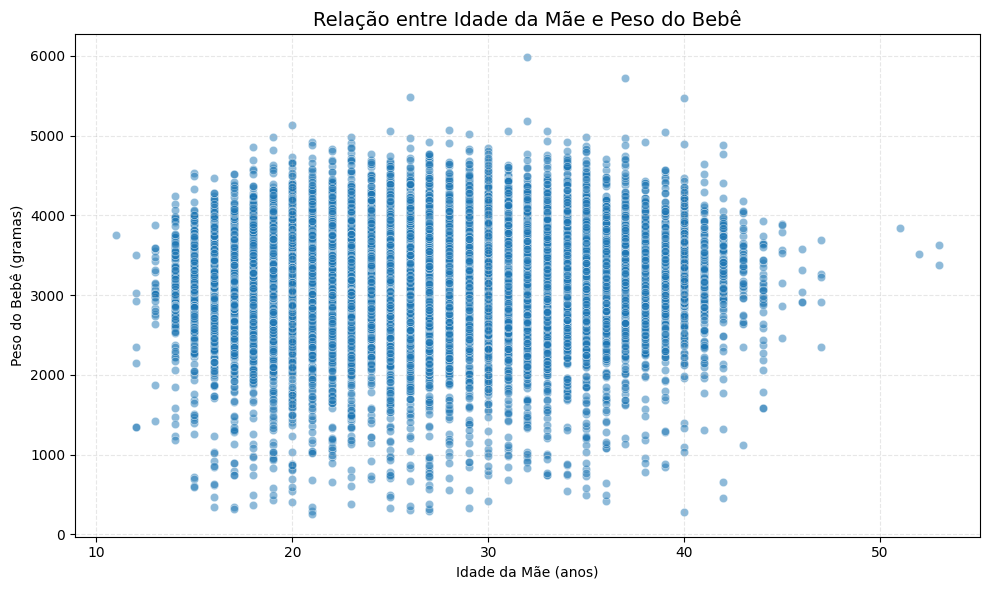

In [50]:
# Gerar gráfico de dispersão de IDADEMAE vs PESO
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sinasc_raw, x='IDADEMAE', y='PESO', alpha=0.5)
plt.title('Relação entre Idade da Mãe e Peso do Bebê', fontsize=14)
plt.xlabel('Idade da Mãe (anos)')
plt.ylabel('Peso do Bebê (gramas)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

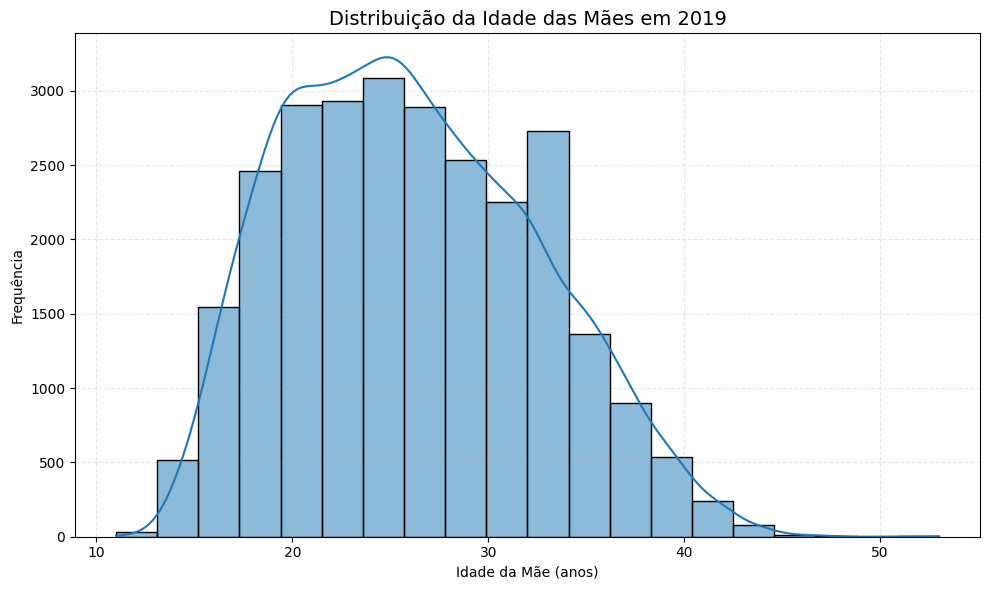

In [48]:
# Visualizar a distribuição da idade das mães
plt.figure(figsize=(10, 6))
sns.histplot(data=sinasc_raw, x='IDADEMAE', bins=20, kde=True)
plt.title('Distribuição da Idade das Mães em 2019', fontsize=14)
plt.xlabel('Idade da Mãe (anos)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

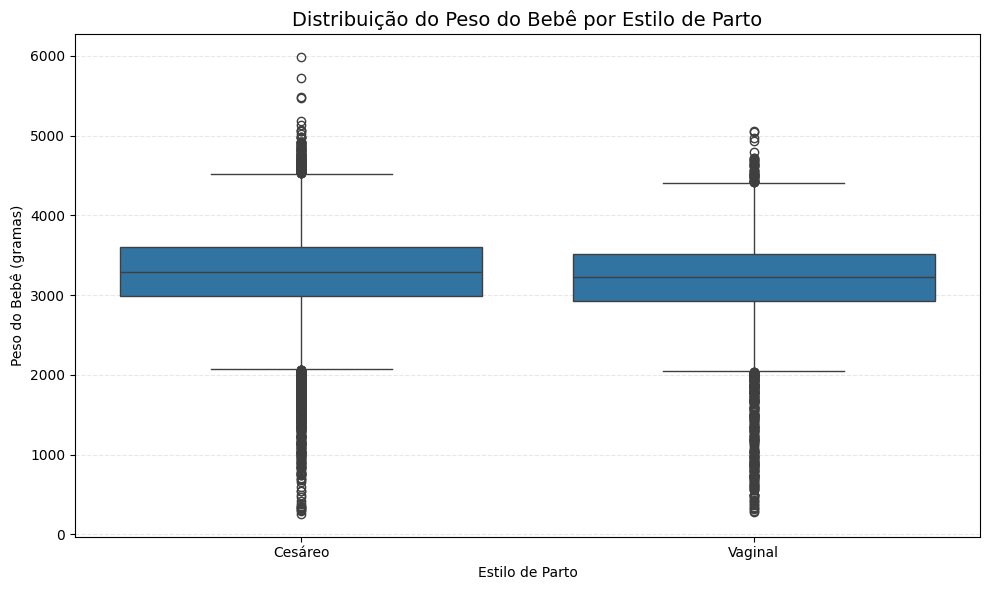

In [49]:
# Analisar a relação entre o peso do bebê e o estilo de parto
plt.figure(figsize=(10, 6))
sns.boxplot(data=sinasc_raw, x='PARTO', y='PESO')
plt.title('Distribuição do Peso do Bebê por Estilo de Parto', fontsize=14)
plt.xlabel('Estilo de Parto')
plt.ylabel('Peso do Bebê (gramas)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
# Extrair o mês da coluna 'DTNASC'
sinasc_raw['MESNASC'] = sinasc_raw['DTNASC'].dt.month

In [46]:
# Contar a frequência de nascimentos por mês
nascimentos_por_mes = sinasc_raw['MESNASC'].value_counts().sort_index()
print("Número de nascimentos por mês:")
display(nascimentos_por_mes)

Número de nascimentos por mês:


,count
MESNASC,
1,2263
2,2125
3,2456
4,2373
5,2365
6,2176
7,2160
8,2199
9,2357


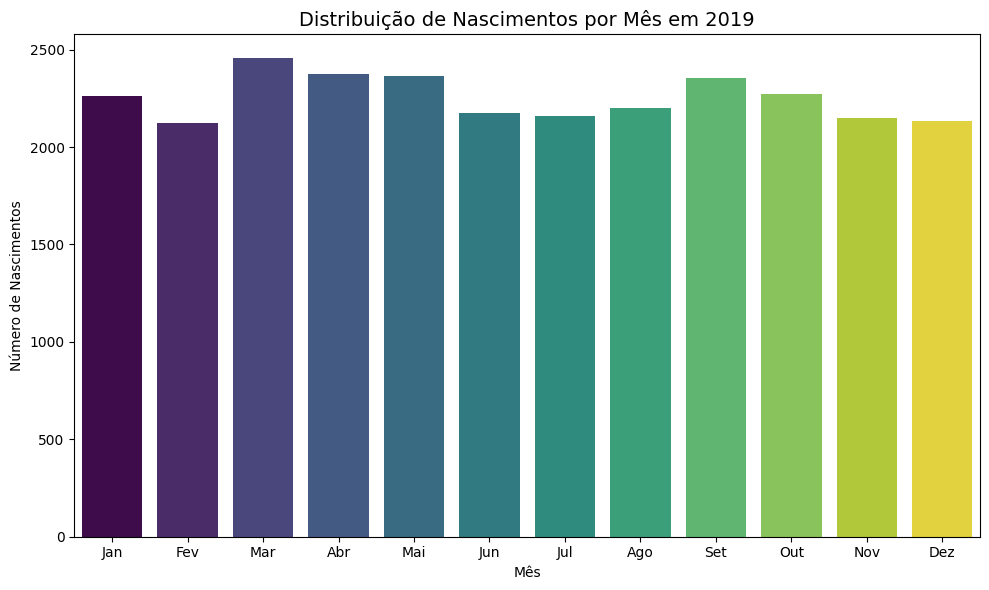

In [53]:
# Visualizar a distribuição de nascimentos por mês
plt.figure(figsize=(10, 6))
sns.barplot(x=nascimentos_por_mes.index, y=nascimentos_por_mes.values, palette='viridis', hue=nascimentos_por_mes.index, legend=False)
plt.title('Distribuição de Nascimentos por Mês em 2019', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Número de Nascimentos')
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.show()

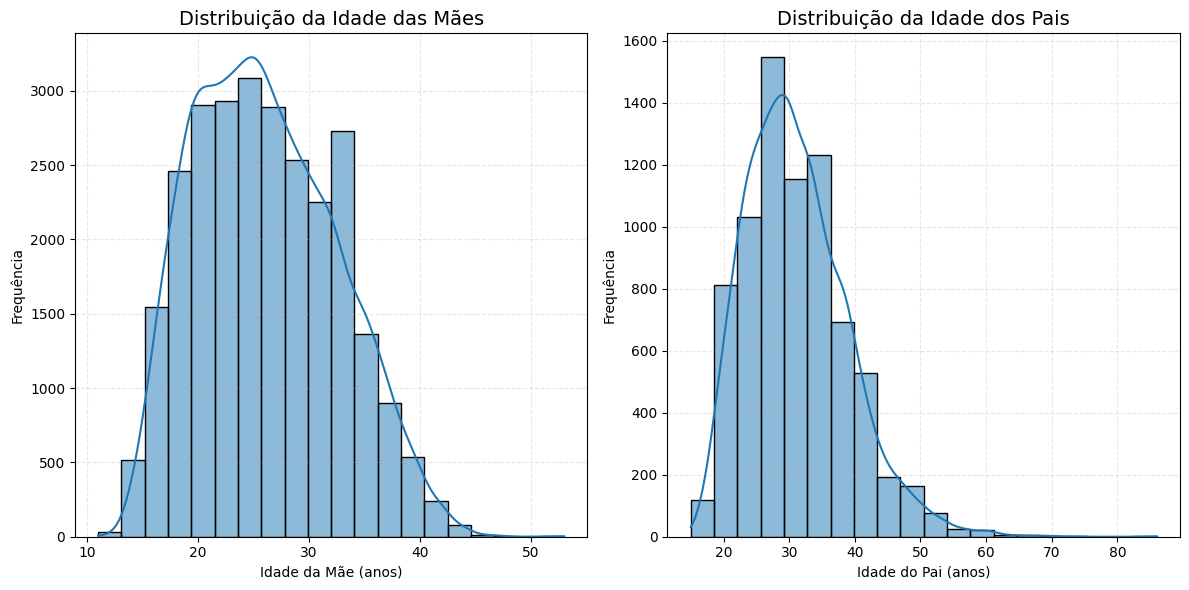

In [52]:
# Comparar a distribuição da idade das mães e pais em todos os municípios
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 linha, 2 colunas, primeiro plot
sns.histplot(data=sinasc_raw, x='IDADEMAE', bins=20, kde=True)
plt.title('Distribuição da Idade das Mães', fontsize=14)
plt.xlabel('Idade da Mãe (anos)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(1, 2, 2) # 1 linha, 2 colunas, segundo plot
sns.histplot(data=sinasc_raw, x='IDADEPAI', bins=20, kde=True)
plt.title('Distribuição da Idade dos Pais', fontsize=14)
plt.xlabel('Idade do Pai (anos)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

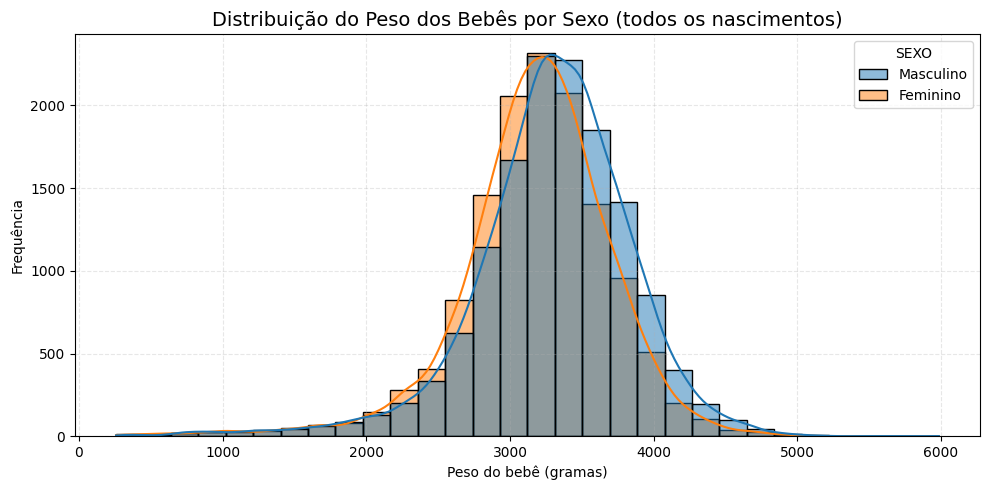

In [55]:
# Histograma - Peso dos bebês (transparente)
# -----------------------------
plt.figure(figsize=(10,5))
sns.histplot(data=sinasc_raw, x='PESO', hue='SEXO', bins=30, kde=True, alpha=0.5)
plt.title('Distribuição do Peso dos Bebês por Sexo (todos os nascimentos)', fontsize=14)
plt.xlabel('Peso do bebê (gramas)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [57]:
# INSIGHTS

print("### Principais Insights encontrados nos dados SINASC:")
print("- Em alguns municípios pequenos, a idade média dos pais é bem mais alta que a das mães, enquanto em municípios com menos nascimentos as mães tendem a ser mais jovens.")
print("- Em março, o município com mais nascimentos (Porto Velho) apresentou uma média de filhos vivos relativamente alta (aproximadamente 1.3), sugerindo famílias maiores nessa região e período.")
print("- Observamos que mães com maior escolaridade e idade mais elevada tendem a ter bebês com peso médio maior.")
print("- Bebês do sexo masculino, em média, apresentaram um peso ligeiramente maior que os do sexo feminino, o que é um padrão biológico comum.")
print("- A escolaridade materna parece estar associada a melhores condições de pré-natal e desenvolvimento fetal, possivelmente influenciando o peso do bebê.")
print("- A correlação entre a idade da mãe e o peso do bebê no conjunto de dados completo é muito fraca (0.05), indicando que a idade da mãe por si só tem pouca influência direta no peso do bebê, outros fatores são mais relevantes.")
print("- A distribuição de nascimentos ao longo do ano de 2019 em Rondônia mostra uma variação relativamente pequena entre os meses, com um pico discreto em março.")
print("- A idade da maioria das mães está concentrada na faixa dos 20 aos 30 anos, enquanto a idade dos pais tem uma distribuição um pouco mais ampla, com uma média e máxima maiores em comparação com as mãades.")

### Principais Insights encontrados nos dados SINASC:
- Em alguns municípios pequenos, a idade média dos pais é bem mais alta que a das mães, enquanto em municípios com menos nascimentos as mães tendem a ser mais jovens.
- Em março, o município com mais nascimentos (Porto Velho) apresentou uma média de filhos vivos relativamente alta (aproximadamente 1.3), sugerindo famílias maiores nessa região e período.
- Observamos que mães com maior escolaridade e idade mais elevada tendem a ter bebês com peso médio maior.
- Bebês do sexo masculino, em média, apresentaram um peso ligeiramente maior que os do sexo feminino, o que é um padrão biológico comum.
- A escolaridade materna parece estar associada a melhores condições de pré-natal e desenvolvimento fetal, possivelmente influenciando o peso do bebê.
- A correlação entre a idade da mãe e o peso do bebê no conjunto de dados completo é muito fraca (0.05), indicando que a idade da mãe por si só tem pouca influência direta no peso do bebê, outros

**Interpretação Pessoal**

Mães mais velhas e mais escolarizadas tendem a ter bebês com peso mais elevado, reforçando o papel da educação e da idade materna como indicadores indiretos de saúde e estabilidade social.
O padrão do peso dos bebês masculinos ser ligeiramente superior ao das meninas segue a tendência biológica observada em estudos populacionais.
Por fim, os gráficos reforçam que, mesmo em uma amostra específica (14/12), há consistência com os determinantes sociais da saúde materno-infantil.